In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
import math
import os
import cv2

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

from keras.models import load_model

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Flatten


2022-12-24 18:17:07.363874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import glob

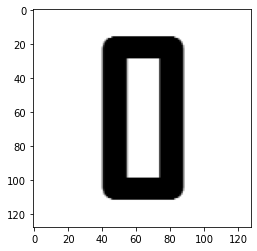

In [5]:
im = cv2.imread('EnglishFnt/English/Fnt/Sample001/img001-00002.png')
# im_resized = cv2.resize(im, (224, 2240), interpolation=cv2.INTER_LINEAR)
plt.imshow(im)
plt.show()

In [6]:
im.shape

(128, 128, 3)

In [7]:
npsample = np.array(im)

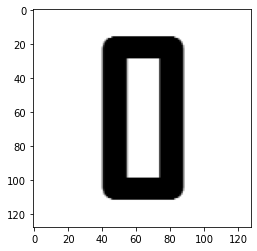

In [8]:
plt.imshow(npsample)

In [9]:
npsample.shape

(128, 128, 3)

In [10]:
numclasses = 62
classes = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

len(classes)

62

In [11]:
for i in range(len(classes)):
    print(i+1,classes[i],i)

1 0 0
2 1 1
3 2 2
4 3 3
5 4 4
6 5 5
7 6 6
8 7 7
9 8 8
10 9 9
11 A 10
12 B 11
13 C 12
14 D 13
15 E 14
16 F 15
17 G 16
18 H 17
19 I 18
20 J 19
21 K 20
22 L 21
23 M 22
24 N 23
25 O 24
26 P 25
27 Q 26
28 R 27
29 S 28
30 T 29
31 U 30
32 V 31
33 W 32
34 X 33
35 Y 34
36 Z 35
37 a 36
38 b 37
39 c 38
40 d 39
41 e 40
42 f 41
43 g 42
44 h 43
45 i 44
46 j 45
47 k 46
48 l 47
49 m 48
50 n 49
51 o 50
52 p 51
53 q 52
54 r 53
55 s 54
56 t 55
57 u 56
58 v 57
59 w 58
60 x 59
61 y 60
62 z 61


In [12]:
import csv

In [13]:
root = 'EnglishFnt/English/Fnt/*'
fieldnames = ['image_name', 'character']
with open('characters.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for path in glob.glob(root, recursive=True):
        for img in glob.glob(path + '/*'):
#           print(int(path.split('e')[-1]))
        
                
                

                
            
                character = int(path.split('e')[-1])
                image_name = img.split('.')[0].split('/')[-2:]
                image_name = image_name[0]+'/'+image_name[1]
                writer.writerow({'image_name': image_name, 'character': classes[character-1]})
            
        

In [14]:
path = 'EnglishFnt/English/Fnt/'

In [15]:
df = pd.read_csv('characters.csv')

In [16]:
df = df.loc[:]

In [17]:
df.head(10)

,image_name,character
0,Sample051/img051-00378,o
1,Sample051/img051-00422,o
2,Sample051/img051-00344,o
3,Sample051/img051-00350,o
4,Sample051/img051-00436,o
5,Sample051/img051-00387,o
6,Sample051/img051-00393,o
7,Sample051/img051-00608,o
8,Sample051/img051-00146,o
9,Sample051/img051-00620,o


In [18]:
df[1016*5:]

,image_name,character
5080,Sample034/img034-00397,X
5081,Sample034/img034-00383,X
5082,Sample034/img034-00368,X
5083,Sample034/img034-00354,X
5084,Sample034/img034-00432,X
...,...,...
62987,Sample015/img015-00166,E
62988,Sample015/img015-00600,E
62989,Sample015/img015-00614,E
62990,Sample015/img015-00172,E


In [19]:
file= open('characters.csv')

In [20]:
csvreader = csv.reader(file)

In [21]:
fieldnames = []
fieldnames = next(csvreader)
fieldnames

['image_name', 'character']

In [22]:
dataset = []
for row in csvreader:
        dataset.append(row)
dataset[:]

[['Sample051/img051-00378', 'o'],
 ['Sample051/img051-00422', 'o'],
 ['Sample051/img051-00344', 'o'],
 ['Sample051/img051-00350', 'o'],
 ['Sample051/img051-00436', 'o'],
 ['Sample051/img051-00387', 'o'],
 ['Sample051/img051-00393', 'o'],
 ['Sample051/img051-00608', 'o'],
 ['Sample051/img051-00146', 'o'],
 ['Sample051/img051-00620', 'o'],
 ['Sample051/img051-00634', 'o'],
 ['Sample051/img051-00152', 'o'],
 ['Sample051/img051-00807', 'o'],
 ['Sample051/img051-00813', 'o'],
 ['Sample051/img051-00185', 'o'],
 ['Sample051/img051-00191', 'o'],
 ['Sample051/img051-00768', 'o'],
 ['Sample051/img051-00032', 'o'],
 ['Sample051/img051-00754', 'o'],
 ['Sample051/img051-00998', 'o'],
 ['Sample051/img051-00740', 'o'],
 ['Sample051/img051-00026', 'o'],
 ['Sample051/img051-00973', 'o'],
 ['Sample051/img051-00967', 'o'],
 ['Sample051/img051-00797', 'o'],
 ['Sample051/img051-00783', 'o'],
 ['Sample051/img051-00218', 'o'],
 ['Sample051/img051-00556', 'o'],
 ['Sample051/img051-00230', 'o'],
 ['Sample051/i

In [23]:
import random
random.shuffle(dataset)
dataset

[['Sample012/img012-00543', 'B'],
 ['Sample059/img059-00933', 'w'],
 ['Sample001/img001-00996', '0'],
 ['Sample021/img021-00040', 'K'],
 ['Sample008/img008-00326', '7'],
 ['Sample037/img037-00695', 'a'],
 ['Sample039/img039-00633', 'c'],
 ['Sample047/img047-00670', 'k'],
 ['Sample058/img058-00580', 'v'],
 ['Sample060/img060-00311', 'x'],
 ['Sample032/img032-00758', 'V'],
 ['Sample017/img017-00803', 'G'],
 ['Sample037/img037-00334', 'a'],
 ['Sample021/img021-00297', 'K'],
 ['Sample014/img014-00145', 'D'],
 ['Sample018/img018-00785', 'H'],
 ['Sample008/img008-00207', '7'],
 ['Sample001/img001-00640', '0'],
 ['Sample014/img014-00009', 'D'],
 ['Sample016/img016-00611', 'F'],
 ['Sample043/img043-00565', 'g'],
 ['Sample001/img001-00494', '0'],
 ['Sample028/img028-00138', 'R'],
 ['Sample042/img042-00799', 'f'],
 ['Sample007/img007-00827', '6'],
 ['Sample041/img041-00818', 'e'],
 ['Sample030/img030-00106', 'T'],
 ['Sample013/img013-00068', 'C'],
 ['Sample017/img017-00602', 'G'],
 ['Sample041/i

In [24]:
fulldata_x = []
fulldata_y = []
for data in dataset:
    fulldata_x.append(data[0])
    fulldata_y.append(data[1])
fulldata_x

['Sample012/img012-00543',
 'Sample059/img059-00933',
 'Sample001/img001-00996',
 'Sample021/img021-00040',
 'Sample008/img008-00326',
 'Sample037/img037-00695',
 'Sample039/img039-00633',
 'Sample047/img047-00670',
 'Sample058/img058-00580',
 'Sample060/img060-00311',
 'Sample032/img032-00758',
 'Sample017/img017-00803',
 'Sample037/img037-00334',
 'Sample021/img021-00297',
 'Sample014/img014-00145',
 'Sample018/img018-00785',
 'Sample008/img008-00207',
 'Sample001/img001-00640',
 'Sample014/img014-00009',
 'Sample016/img016-00611',
 'Sample043/img043-00565',
 'Sample001/img001-00494',
 'Sample028/img028-00138',
 'Sample042/img042-00799',
 'Sample007/img007-00827',
 'Sample041/img041-00818',
 'Sample030/img030-00106',
 'Sample013/img013-00068',
 'Sample017/img017-00602',
 'Sample041/img041-00168',
 'Sample054/img054-00836',
 'Sample022/img022-00300',
 'Sample010/img010-00684',
 'Sample038/img038-00139',
 'Sample025/img025-00132',
 'Sample007/img007-00377',
 'Sample044/img044-00221',
 

In [25]:
dataset[47263]

['Sample042/img042-00958', 'f']

In [26]:
fulldata_x[47263]

'Sample042/img042-00958'

In [27]:
# img = cv2.imread(path+train_x[7]+'.png')
# print(train_y[7])
# plt.imshow(np.array(img))
# plt.show()
print(path + fulldata_x[3] + '.png')

for i in range(len(fulldata_x)):
    img = cv2.imread(path + fulldata_x[i] + '.png')
    data = np.array(img)
    fulldata_x[i] = data
    
# img

EnglishFnt/English/Fnt/Sample021/img021-00040.png


In [30]:
train_x = fulldata_x[:12000]
train_y = fulldata_y[:12000]

In [31]:
test_x = fulldata_x[12000:15000]
test_y = fulldata_y[12000:15000]

D


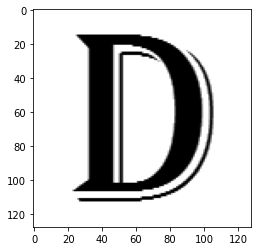

In [32]:
print(fulldata_y[18])
plt.imshow(np.array(fulldata_x[18]))
plt.show()

/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

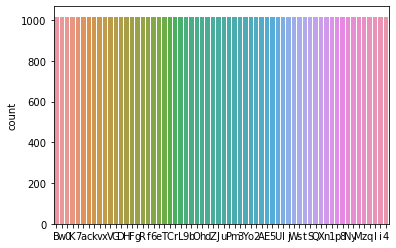

In [33]:
import seaborn as sns
sns.countplot(train_y)

In [34]:
train_x[9].shape

(128, 128, 3)

In [35]:
# from tensorflow.keras.utils import img_to_array
# from tensorflow.keras.utils import load_img

# root = 'EnglishFnt/English/Fnt/*'
# p= 'EnglishFnt/English/Fnt/'
# fieldnames = ['img_name', 'character']
# with open('charactersdata.csv', 'w', newline='') as file:
#     writer = csv.DictWriter(file, fieldnames=fieldnames)
#     writer.writeheader()
#     for path in glob.glob(root, recursive=True):
#         for img in glob.glob(path + '/*'):
# #           print(int(path.split('e')[-1]))
        
                
                

                
            
#                 character = int(path.split('e')[-1])
#                 image_name = img.split('.')[0].split('/')[-2:]
#                 image_name = image_name[0]+'/'+image_name[1]
#                 img = load_img(p+image_name+'.png')
#                 data = np.array(img)
#                 writer.writerow({'img_name': data, 'character': classes[character-1]})
            
        

In [36]:
# df = pd.read_csv('charactersdata.csv')

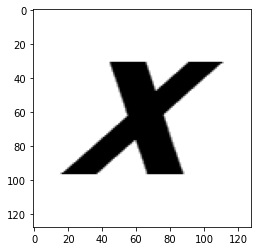

x


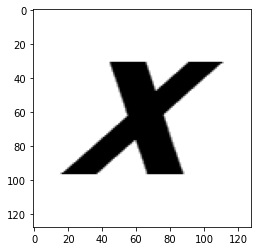

In [37]:
# just checking how data looks like
plt.imshow(train_x[9])
plt.show()      # in order to execute graph
## however we dont know whether its color image or binary image

## so inorder to plot it change the configuration

print(train_y[9])
plt.imshow(train_x[9], cmap = plt.cm.binary)

In [38]:
train_x[9]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [39]:
np.array(train_x[9]/255.0)
train_x[9]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [40]:
# import tensorflow as tf
# x_train = tf.keras.utils.normalize(train_x , axis =1)
# x_test = tf.keras.utils.normalize(test_x,axis =1)
# plt.imshow(x_train[0])

In [41]:
train_x  = np.divide(train_x,255.0)


array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

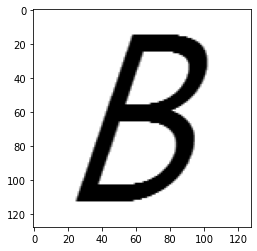

In [42]:
plt.imshow(train_x[0])
train_x[0]

In [61]:

IMG_SIZE = 128
x_trainr = np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE)  ## increasing one dimension for kernel operation
x_testr = np.array(test_x).reshape(-1, IMG_SIZE, IMG_SIZE)  

In [62]:
# x_train = tf.keras.utils.normalize(x_train , axis =1)
# x_test = tf.keras.utils.normalize(x_test,axis =1)
# plt.imshow(x_train[0],cmap = plt.cm.binary)
train_x.shape

(12000, 128, 128, 3)

In [47]:
IMG_SIZE = 128
x_trainr = np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE,1)  ## increasing one dimension for kernel operation
x_testr = np.array(test_x).reshape(-1, IMG_SIZE, IMG_SIZE,1)  ## increasing one dimension for kernel operation

print("Training Samples dimension ", x_trainr.shape)
print("Testing Samples dimension ", x_testr.shape)

Training Samples dimension  (36000, 128, 128, 1)
Testing Samples dimension  (9000, 128, 128, 1)


In [48]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False
)
datagen.fit(x_trainr)

In [49]:
x_trainr.shape

(36000, 128, 128, 1)

In [50]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [51]:
### Creating a neural network now
model = Sequential()

### First Convolution layer
model.add(Conv2D(32,(5,5),padding = 'Same',input_shape= x_trainr.shape[1:]))    ## only for first convolution layer to mention input layer size
model.add(Activation("relu"))   ## activation function to make it non-linear <0 reomve >0
model.add(Conv2D(32,(5,5),padding = 'Same'))    ## only for first convolution layer to mention input layer size
model.add(Activation("relu"))   ## activation function to make it non-linear <0 reomve >0
model.add(MaxPooling2D(pool_size= (2,2)))    ## Max Pooling single maximum value of 2X2
model.add(Dropout(0.25))



### Second Convolution layer
model.add(Conv2D(64,(3,3),padding = 'Same'))    ## 2nd Convolution layer
model.add(Activation("relu"))   ## activation function
model.add(Conv2D(64,(3,3),padding = 'Same'))    ## 2nd Convolution layer
model.add(Activation("relu"))   ## activation function
model.add(MaxPooling2D(pool_size= (2,2), strides=(2,2))) 
model.add(Dropout(0.25))

### Third Convolution layer
model.add(Conv2D(64,(3,3),padding = 'Same'))    ## 3rd Convolution layer
model.add(Activation("relu"))   ## activation function
model.add(Conv2D(64,(3,3),padding = 'Same'))    ## 3rd Convolution layer
model.add(Activation("relu"))   ## activation function
model.add(MaxPooling2D(pool_size= (2,2), strides=(2,2))) 


## Fullly connected layer #1
model.add(Flatten())     ### Before using fully connected layer , need to be flatten so that 2D to 1 D
model.add(Dropout(0.25))
# model.add(Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(Dropout(0.35))


# ## Fullly connected layer #2
model.add(Dense(256))     
model.add(Activation("relu"))

## Last Fullly connected layer #3, output must be equal to number of classes , 10(0-9)
model.add(Dense(62))     
model.add(Activation("softmax"))  ## class probabilities

model.summary()

2022-12-24 18:26:52.713300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      832       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 activation_1 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                        

In [52]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


In [53]:
print("Total training samples = ", len(x_trainr))

Total training samples =  36000


In [54]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = opt , metrics = ['accuracy'])

In [59]:
x_trainr.shape
train_y *=3

In [60]:
model.fit(datagen.flow(x_trainr, train_y, batch_size =64 ),epochs = 5, verbose =1)



Epoch 1/5


2022-12-24 18:29:43.486434: W tensorflow/core/framework/op_kernel.cc:1807] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'Cast_49' defined at (most recent call last):
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/z5/gzlxs9yd1y18v1y7_m7jcmg40000gn/T/ipykernel_44496/4029041207.py", line 1, in <cell line: 1>
      model.fit(datagen.flow(x_trainr, train_y, batch_size =64 ),epochs = 5, verbose =1)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1028, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1122, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/nehaaggarwal/opt/anaconda3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_49'
Cast string to float is not supported
	 [[{{node Cast_49}}]] [Op:__inference_train_function_2268]